       Our goal for this study is to find out if there is a connection between 'Hepatitis B' immunization and 'infant deaths'. In this study we are going to do a t-test for the countries which have the lowest and highest %10  of 'Hepatitis B' immunization for 'infant deaths'. The first thing we should follow after reading the data and just before the cleaning null cells is choosing two columns named 'Hepatitis B' and 'infant deaths' and assign them a new variable as a dataframe via pandas. The reason for doing this is to pretend to lose data which is not null for 'Hepatitis B' and 'infant deaths' columns neither but others.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#reading csv 
df = pd.read_csv('/Users/samilyildiz/Desktop/LED.csv')
df1 = df[['Hepatitis B', 'infant deaths','Life expectancy ']]
df1 = df1.dropna()
df1

,Hepatitis B,infant deaths,Life expectancy
0,65.0,62,65.0
1,62.0,64,59.9
2,64.0,66,59.9
3,67.0,69,59.5
4,68.0,71,59.2
...,...,...,...
2933,68.0,27,44.3
2934,7.0,26,44.5
2935,73.0,25,44.8
2936,76.0,25,45.3


Next step is sorting 'Hepatitis B' column in ascending order. We are going to use this for calculating the lowest %10.

In [55]:
df1 = df1.sort_values(['Hepatitis B'])

After the sorting process there are going to be new indices. To calculate the lowest %10 we should reset the indices and delete the former ones.

In [56]:
df1 = df1.reset_index()

In [57]:
del(df1['index'])

In [58]:
df1

,Hepatitis B,infant deaths,Life expectancy
0,1.0,65,47.8
1,2.0,1,81.1
2,2.0,1,81.1
3,2.0,38,64.3
4,2.0,3,57.9
...,...,...,...
2370,99.0,1,76.9
2371,99.0,1,73.8
2372,99.0,1,73.7
2373,99.0,0,77.0


Now we will compute the lowest and highest %10 of the data and assign them to a new dataframe

In [75]:
df1high = df1.tail(df1.shape[0]//10)
df1low = df1.head(df1.shape[0]//10)


Now let's see our new dataframes

In [76]:
df1low

,Hepatitis B,infant deaths,Life expectancy
0,1.0,65,47.8
1,2.0,1,81.1
2,2.0,1,81.1
3,2.0,38,64.3
4,2.0,3,57.9
...,...,...,...
232,43.0,42,62.2
233,43.0,7,62.8
234,43.0,27,68.6
235,43.0,0,63.4


In [77]:
df1high

,Hepatitis B,infant deaths,Life expectancy
2138,99.0,0,75.1
2139,99.0,0,75.6
2140,99.0,70,73.0
2141,99.0,4,66.7
2142,99.0,0,75.8
...,...,...,...
2370,99.0,1,76.9
2371,99.0,1,73.8
2372,99.0,1,73.7
2373,99.0,0,77.0


Just to make it clear we are going to reset the index of df1high.

In [79]:
df1high = df1high.reset_index()
del(df1high['index'])
df1high

,Hepatitis B,infant deaths,Life expectancy
0,99.0,0,75.1
1,99.0,0,75.6
2,99.0,70,73.0
3,99.0,4,66.7
4,99.0,0,75.8
...,...,...,...
232,99.0,1,76.9
233,99.0,1,73.8
234,99.0,1,73.7
235,99.0,0,77.0


Now it is time to find the means of 'infant deaths' for both df1low and df1high

In [80]:
lmean = df1low['infant deaths'].mean()
lmean

82.38818565400844

In [81]:
hmean = df1high['infant deaths'].mean()
hmean

10.50210970464135

In [82]:
df1

,Hepatitis B,infant deaths,Life expectancy
0,1.0,65,47.8
1,2.0,1,81.1
2,2.0,1,81.1
3,2.0,38,64.3
4,2.0,3,57.9
...,...,...,...
2370,99.0,1,76.9
2371,99.0,1,73.8
2372,99.0,1,73.7
2373,99.0,0,77.0


Computing tvalue and pvalue via using ttest_ind 

In [83]:
from scipy.stats import ttest_ind
ttest_value = ttest_ind(df1low['infant deaths'], df1high['infant deaths'], equal_var = False)

In [84]:
ttest_value

Ttest_indResult(statistic=4.257526749476884, pvalue=2.9471554763011245e-05)

It will also be helpfull to know how to calculate t-value with formula

In [86]:
meandif = lmean - hmean
slow = int(df1low['infant deaths'].std())
shigh = int(df1high['infant deaths'].std())
se = np.sqrt(((np.square(slow)/len(df1low) + np.square(shigh)/len(df1high))))
t_value = meandif / se
t_value

4.266731606508253

Visualization

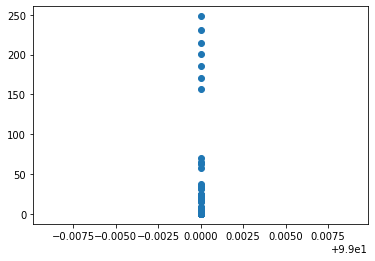

In [87]:
plt.scatter(df1high['Hepatitis B'], df1high['infant deaths'])


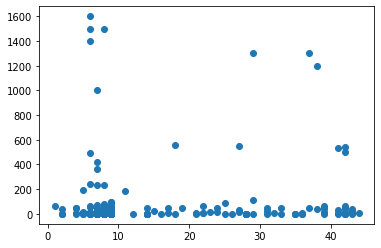

In [88]:
plt.scatter(df1low['Hepatitis B'], df1low['infant deaths'])

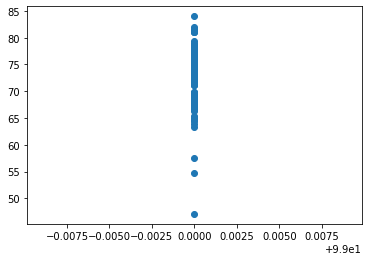

In [90]:
plt.scatter(df1high['Hepatitis B'], df1high['Life expectancy '])

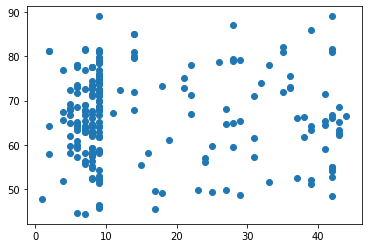

In [91]:
plt.scatter(df1low['Hepatitis B'], df1low['Life expectancy '])

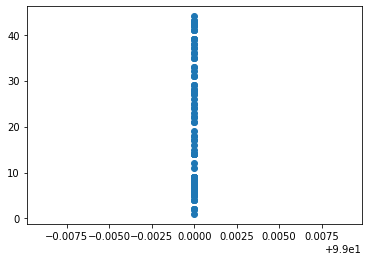

In [92]:
plt.scatter(df1high['Hepatitis B'], df1low['Hepatitis B'])

Text(0, 0.5, 'Life expectancy of low')

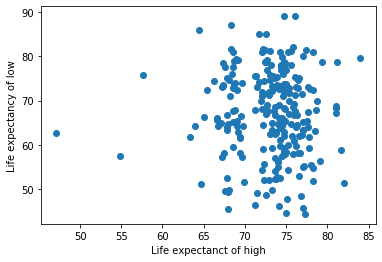

In [95]:
plt.scatter(df1high['Life expectancy '],df1low['Life expectancy '])
plt.xlabel('Life expectanct of high')
plt.ylabel('Life expectancy of low')